In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, ifft

def compute_cepstrum(signal, fs):
    # do sampling
    signal = signal[:fs]
    #  and apply window function
    signal = signal * np.hamming(len(signal))
    # 신호에 FFT를 적용해 스펙트럼을 계산
    spectrum = fft(signal)
    # 스펙트럼의 로그 절댓값을 계산
    log_amplitude = np.log(np.abs(spectrum) + 1e-8)
    # 로그 스펙트럼에 IFFT를 적용해 켑스트럼을 계산
    cepstrum = ifft(log_amplitude).real
    return cepstrum

def plot_signal_and_cepstrum(signal, cepstrum, fs, title):
    time = np.arange(len(signal)) / fs
    quefrency = np.arange(len(cepstrum)) / fs
    
    plt.figure(figsize=(12, 6))
    
    # Plot the time-domain signal
    plt.subplot(2, 1, 1)
    plt.plot(time, signal)
    plt.title(f"Time-Domain Signal - {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot the cepstrum
    plt.subplot(2, 1, 2)
    plt.plot(quefrency, cepstrum)
    plt.title(f"Cepstrum - {title}")
    plt.xlabel("Quefrency (s)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()


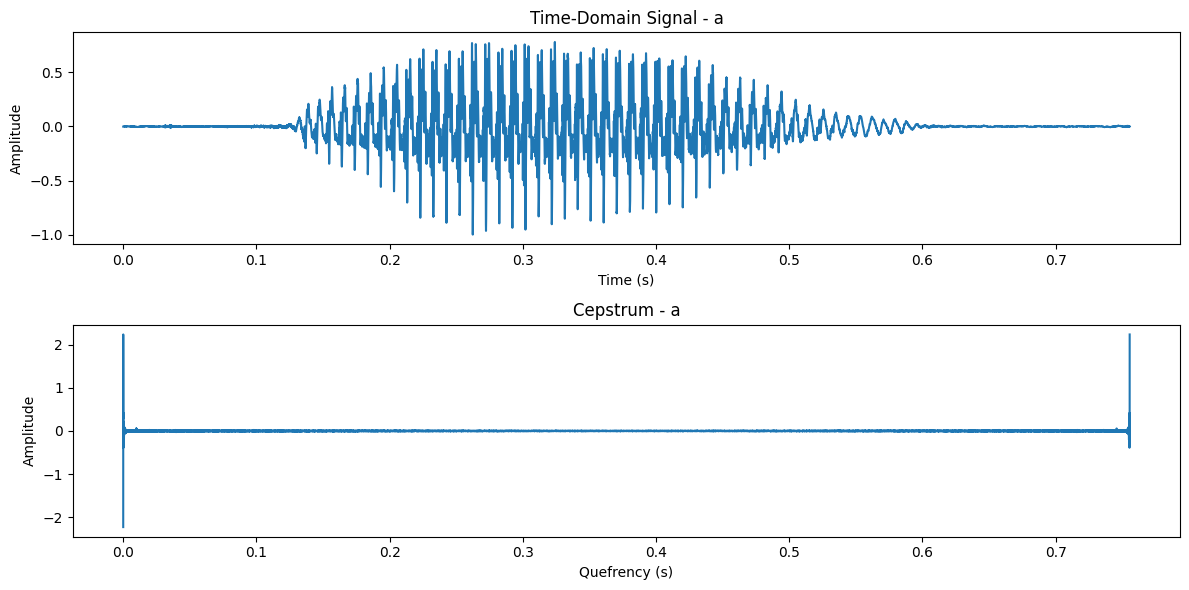

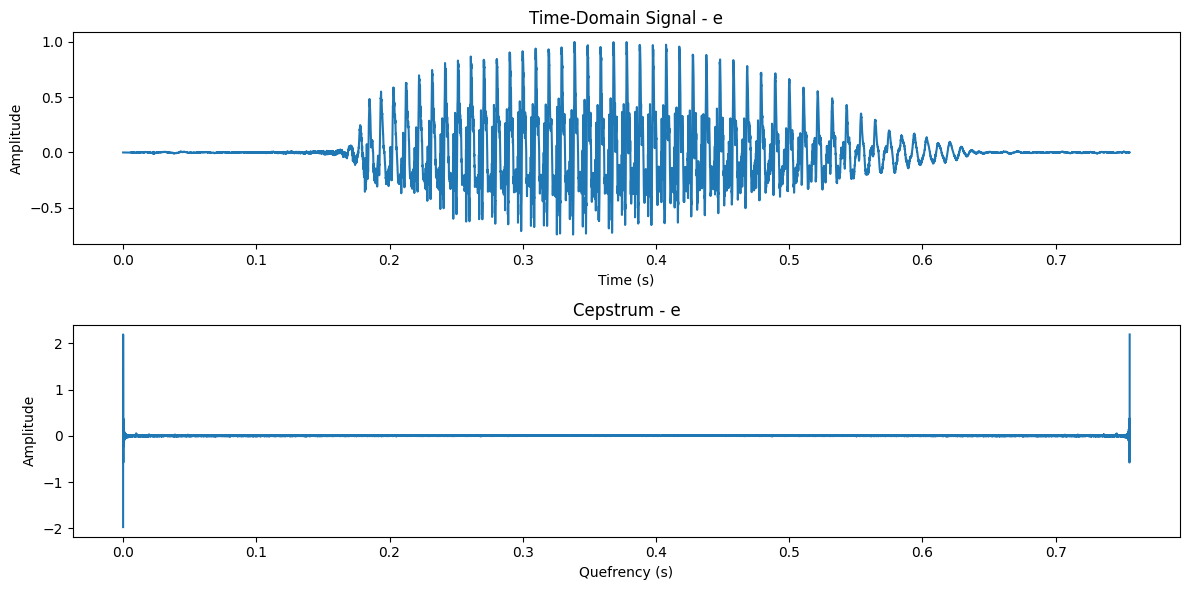

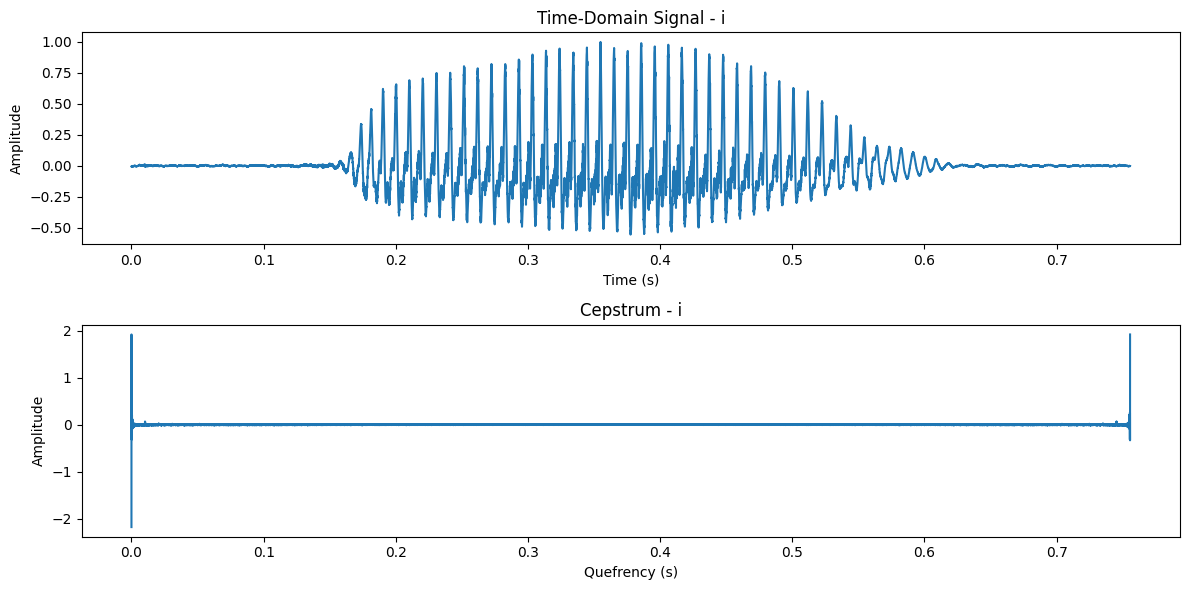

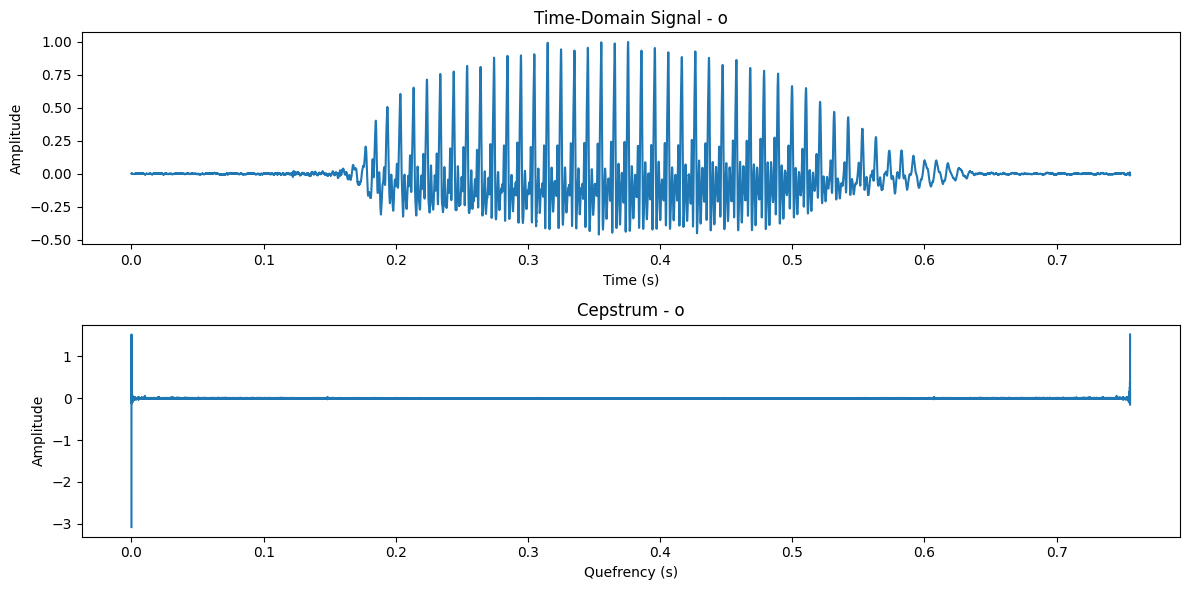

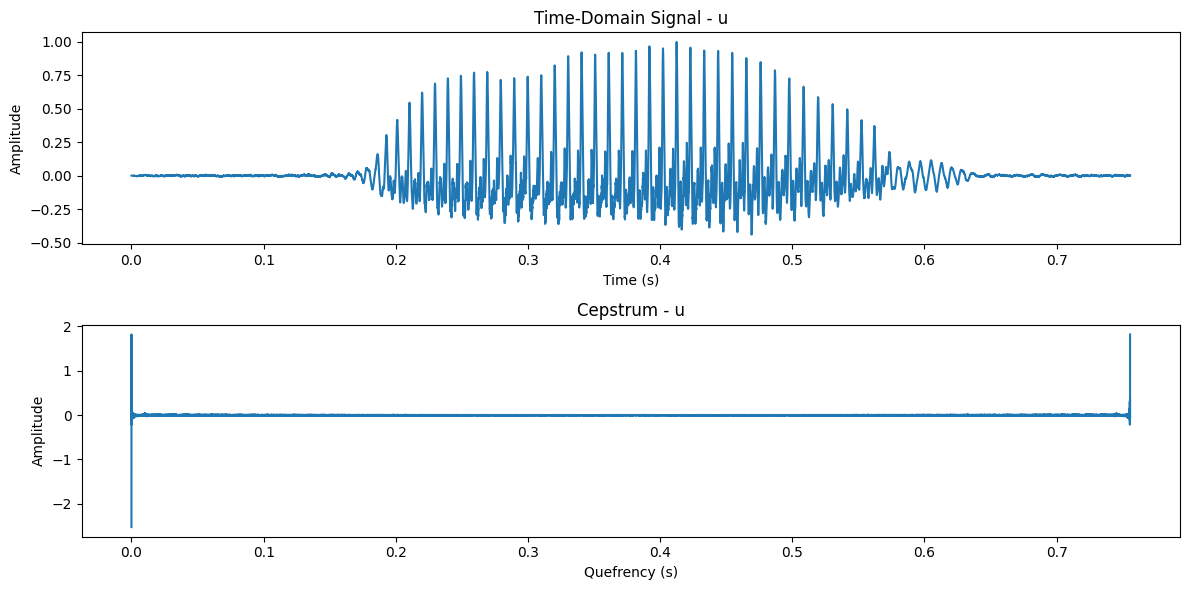

In [12]:
fs1, a = wavfile.read('./vocal_src/male/male_0_a.wav')
fs2, e = wavfile.read('./vocal_src/male/male_0_e.wav')
fs3, i = wavfile.read('./vocal_src/male/male_0_i.wav')
fs4, o = wavfile.read('./vocal_src/male/male_0_o.wav')
fs5, u = wavfile.read('./vocal_src/male/male_0_u.wav')

a = a / np.max(np.abs(a),axis=0)
e = e / np.max(np.abs(e),axis=0)
i = i / np.max(np.abs(i),axis=0)
o = o / np.max(np.abs(o),axis=0)
u = u / np.max(np.abs(u),axis=0)

cepstrum1 = compute_cepstrum(a, fs1)
cepstrum2 = compute_cepstrum(e, fs2)
cepstrum3 = compute_cepstrum(i, fs3)
cepstrum4 = compute_cepstrum(o, fs4)
cepstrum5 = compute_cepstrum(u, fs5)

plot_signal_and_cepstrum(a, cepstrum1, fs1, "a")
plot_signal_and_cepstrum(e, cepstrum2, fs2, "e")
plot_signal_and_cepstrum(i, cepstrum3, fs3, "i")
plot_signal_and_cepstrum(o, cepstrum4, fs4, "o")
plot_signal_and_cepstrum(u, cepstrum5, fs5, "u")